### Assessing cloudless days: clear sky days 

In [1]:
import matplotlib
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
#%matplotlib notebook
%matplotlib inline
import csv
import bisect
from matplotlib import dates
from datetime import datetime
from scipy import interpolate
from matplotlib.dates import DateFormatter

# User defined functions
from load_data_from_csv import *

#### Import weather station data from Luzern Switzerland

In [33]:
irad_csv = r'irradiation_luz_2017_2018.csv'

df_rad = process_LUZ(irad_csv)
df_rad.set_index(df_rad.datetime, inplace=True)
s_rad = df_rad['gre000z0']          # 10 min mean in W/m² 

#lu_rad.head(n=2)

#### Import  sunshine duration, daily sum

In [34]:
dur_csv = r'sunshine_duration_2017_2018.csv'

df_dur = process_LUZ_dur(dur_csv)
df_dur.set_index(df_dur.datetime, inplace=True)
df_dur['su2000d0'] = pd.to_numeric(df_dur['su2000d0'], errors='coerce')
s_dur = df_dur['su2000d0']          # in hours

#### Import sunshine duration, relative to the absolute possible daily sum

In [35]:
dur_csv = r'sunshine_duration_2017_2018.csv'

df_rel = process_LUZ_dur(dur_csv)
df_rel.set_index(df_rel.datetime, inplace=True)
df_rel['sremaxdv'] = pd.to_numeric(df_rel['sremaxdv'], errors='coerce')
s_rel = df_rel['sremaxdv']          # in percent

#### Relative to max possible sunshine duration in 2017 at Luzern 
Description: Sonnenscheindauer; relativ zur absolut möglichen Tagessumme<br>
Long: 8°18' Lat: 47°02'

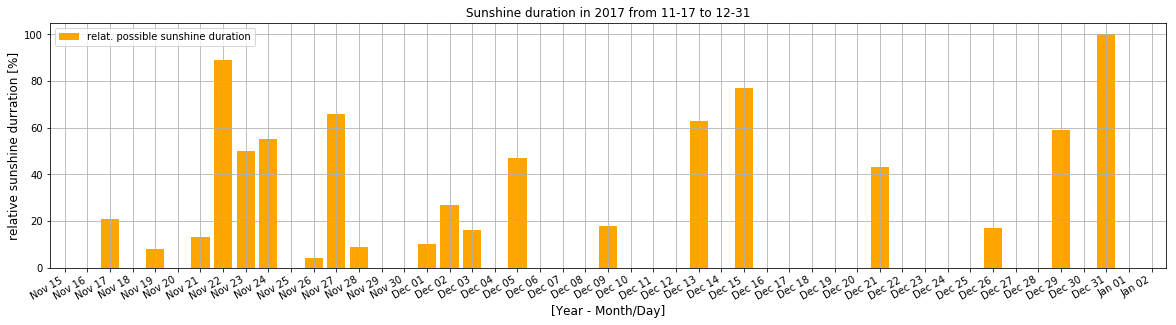

In [63]:
year = '2017-'   
s_day = '11-17' # beginning of observation
e_day = '12-31' # end of observation
start = year + s_day
end   = year + e_day

s_rel = s_rel.loc[start:end]
fig, ax = plt.subplots(figsize=(20,5))
ax.bar(s_rel.index, s_rel.values, label='relat. possible sunshine duration', color= 'orange')

ax.set_xlabel('[Year - Month/Day]', fontsize=12)
ax.set_ylabel('relative sunshine durration [%]', fontsize=12)
ax.set_title('Sunshine duration in {} from {} to {}'.format(year.strip('-'),s_day,e_day))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

#ax.xaxis.set_major_locator(mdates.WeekdayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))
fig.autofmt_xdate()


#### Sunshine duration, daily sum in 2017 at Luzern 
Description: Sonnenscheindauer; Tagessumme<br>
Long: 8°18' Lat: 47°02'

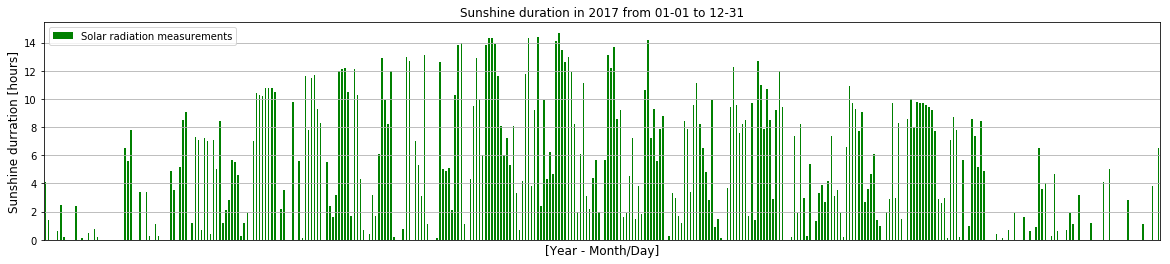

In [6]:
year = '2017-'   
s_day = '01-01' # beginning of observation
e_day = '12-31' # end of observation
start = year + s_day
end   = year + e_day

_lu_dur = lu_dur.loc[start:end]
fig = plt.figure(1, figsize=(20,4))

ax = plt.axes()
_lu_dur.plot(kind='bar',label='Solar radiation measurements', color= 'g',ax=ax)

ax.set_xlabel('[Year - Month/Day]', fontsize=12)
ax.set_ylabel('Sunshine durration [hours]', fontsize=12)
ax.set_title('Sunshine duration in {} from {} to {}'.format(year.strip('-'),s_day,e_day))
ax.legend(loc='upper left')
ax.grid(b=None, which='major', axis='both')

ax.xaxis.set_major_locator(dates.MonthLocator(interval=3))

#fig.autofmt_xdate()
#frmt = df.index.to_series().dt.strftime("%Y-%m-d")
#plt.gca().xaxis.set_major_formatter(plt.FixedFormatter(frmt))
